In [1]:
#https://stackoverflow.com/questions/60060052/looping-or-wrapping-a-colormap-over-a-given-interval

#import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np


In [8]:
for i in range(8):
    print(i/7)

0.0
0.14285714285714285
0.2857142857142857
0.42857142857142855
0.5714285714285714
0.7142857142857143
0.8571428571428571
1.0


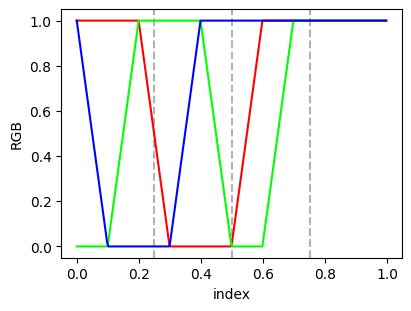

In [2]:
#custom colormap here

#https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html
#linear segmented colormap


cdict = {'red':   [[0.0,  1.0, 1.0],
                   [0.143,  1.0, 1.0],
                   [0.286,  1.0, 1.0],
                   [0.429,  0.0, 0.0],
                   [0.571,  0.0, 0.0],
                   [0.714,  0.0, 0.0],
                   [0.857,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],

         'green': [[0.0,  0.0, 0.0],
                   [0.143,  0.0, 0.0],
                   [0.286,  1.0, 1.0],
                   [0.429,  1.0, 1.0],
                   [0.571,  1.0, 1.0],
                   [0.714,  0.0, 0.0],
                   [0.857,  0.0, 0.0],
                   [1.0,  1.0, 1.0]],
                   
         'blue':  [[0.0,  1.0, 1.0],
                   [0.143,  0.0, 0.0],
                   [0.286,  0.0, 0.0],
                   [0.429,  0.0, 0.0],
                   [0.571,  1.0, 1.0],
                   [0.714,  1.0, 1.0],
                   [0.857,  1.0, 1.0],
                   [1.0,  1.0, 1.0]]}


def plot_linearmap(cdict):
    newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['#ff0000', '#00ff00', '#0000ff']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(cdict)

In [3]:
x=np.arange(0,1024)
nchan=len(x)
cred=np.zeros(nchan)
cgreen=np.zeros(nchan)
cred=np.zeros(nchan)

hsv= LinearSegmentedColormap('testCmap', segmentdata=cdict, N=nchan)

#hsv=cm.get_cmap('hsv',nchan-100)

cmap=hsv(range(nchan))
print('colarray',cmap[0])   

cred=cmap[:,0]
cgreen=cmap[:,1]
cblue=cmap[:,2]

print(cred.shape)

colarray [1. 0. 1. 1.]
(1024,)


/home/lachlan/.pyenv/versions/3.7.13/envs/venv_readoutxfm/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


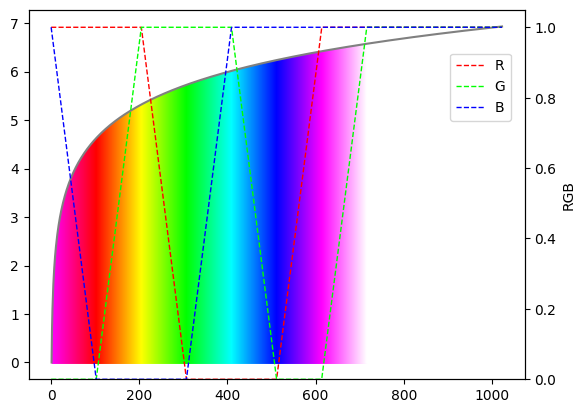

In [4]:

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() 
ax2.set_ylabel('RGB')
ax2.axis(ymin=0,ymax=1.05)

ax2.plot(x, cred, '#ff0000', linestyle='dashed', linewidth=1, label="R")
ax2.plot(x, cgreen, '#00ff00', linestyle='dashed', linewidth=1, label="G")
ax2.plot(x, cblue, '#0000ff', linestyle='dashed', linewidth=1, label="B")

ax2.legend(loc=(0.85,0.7))

y=np.log(x)

ax1.plot(x, y, color="gray")
for i in range(len(y) - 1):
    ax1.fill_between([x[i], x[i+1]], [y[i], y[i+1]], y2=0, color=(cred[i],cgreen[i],cblue[i]))